In [1]:
import glob2
import os
from random import randint
from IPython.core.display import Image, display
import numpy as np
import numpy as np
import tensorflow as tf
from skimage import transform,io
import argparse
import posenet
import time
import cv2

#import PIL
#from PIL import Image

In [2]:


with tf.Session() as sess:
    model_cfg, model_outputs = posenet.load_model(101, sess)
    print(model_cfg);
    print(model_outputs);

        
    output_stride = model_cfg['output_stride']
        
    output_dir='/home/prajwal/cgm-ml'

    if output_dir:
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
                
    training_path = "/home/prajwal/Pictures"

    filenames = [
        f.path for f in os.scandir(training_path) if f.is_file() and f.path.endswith(('.png', '.jpg'))]

    start = time.time()
    for f in filenames:
        input_image, draw_image, output_scale = posenet.read_imgfile(
            f, scale_factor=1, output_stride=output_stride)

        heatmaps_result, offsets_result, displacement_fwd_result, displacement_bwd_result = sess.run(
                model_outputs,
                feed_dict={'image:0': input_image}
            )

        pose_scores, keypoint_scores, keypoint_coords = posenet.decode_multiple_poses(
                heatmaps_result.squeeze(axis=0),
                offsets_result.squeeze(axis=0),
                displacement_fwd_result.squeeze(axis=0),
                displacement_bwd_result.squeeze(axis=0),
                output_stride=output_stride,
                max_pose_detections=10,
                min_pose_score=0.25)

        keypoint_coords *= output_scale

        if output_dir:
            draw_image = posenet.draw_skel_and_kp(
                draw_image, pose_scores, keypoint_scores, keypoint_coords,
                min_pose_score=0.25, min_part_score=0.25)

            cv2.imwrite(os.path.join(output_dir, os.path.relpath(f, training_path)), draw_image)

            
            print(f)
            for pi in range(len(pose_scores)):
                if pose_scores[pi] == 0.:
                    break
                print('Pose #%d, score = %f' % (pi, pose_scores[pi]))
                for ki, (s, c) in enumerate(zip(keypoint_scores[pi, :], keypoint_coords[pi, :, :])):
                    print('Keypoint %s, score = %f, coord = %s' % (posenet.PART_NAMES[ki], s, c))



       

    

/home/prajwal/cgm-ml/posenet/converter/config.py:8: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Cannot find model file ./_models/model-mobilenet_v1_101.pb, converting from tfjs...


/home/prajwal/cgm-ml/posenet/converter/config.py:8: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(cfg_f)


Weights for checkpoint mobilenet_v1_101 are not downloaded. Downloading to /tmp/_posenet_weights ...
INFO:tensorflow:Restoring parameters from ./_models/checkpoints/model-mobilenet_v1_101.ckpt
INFO:tensorflow:Froze 62 variables.
Converted 62 variables to const ops.
{'output_stride': 16, 'checkpoint_name': 'mobilenet_v1_101'}
[<tf.Tensor 'heatmap:0' shape=(1, ?, ?, 17) dtype=float32>, <tf.Tensor 'offset_2:0' shape=(1, ?, ?, 34) dtype=float32>, <tf.Tensor 'displacement_fwd_2:0' shape=(1, ?, ?, 32) dtype=float32>, <tf.Tensor 'displacement_bwd_2:0' shape=(1, ?, ?, 32) dtype=float32>]
/home/prajwal/Pictures/new.jpg
Pose #0, score = 0.745999
Keypoint nose, score = 0.998390, coord = [ 68.8755058  181.81566216]
Keypoint leftEye, score = 0.999257, coord = [ 59.56662897 193.72996617]
Keypoint rightEye, score = 0.998033, coord = [ 59.60660604 170.34837349]
Keypoint leftEar, score = 0.957835, coord = [ 69.99055336 210.22075658]
Keypoint rightEar, score = 0.840029, coord = [ 70.00369686 159.1756797

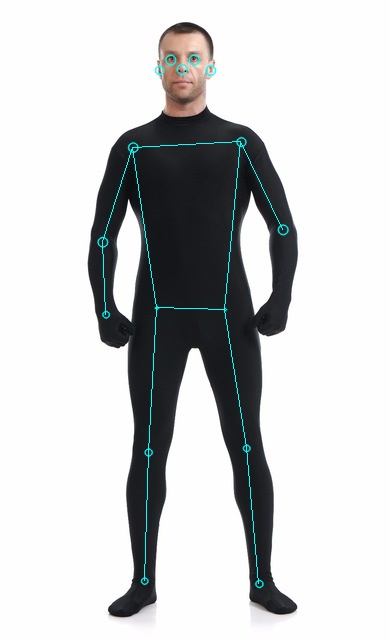

In [3]:
from IPython.display import Image
Image(filename='/home/prajwal/cgm-ml/new.jpg') 

In [6]:
import tensorflow as tf

img = tf.placeholder(name="img", dtype=tf.float32, shape=(1, 337, 337, 3))
val = img + tf.constant([1., 2., 3.]) + tf.constant([1., 4., 4.])
out = tf.identity(val, name="out")
with tf.Session() as sess:
    tflite_model = tf.contrib.lite.toco_convert(, [img], [out])
    open("test.tflite", "wb").write(tflite_model)

NameError: name 'tempfile' is not defined